<a href="https://colab.research.google.com/github/AlirezaAhadipour/PyTorch-deep-learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make some data
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f'First 3 samples of X: \n {X[:3]}')
print(f'First 3 samples of y: \n {y[:3]}')

First 3 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]]
First 3 samples of y: 
 [1 1 1]


In [5]:
# Make a dataframe of circle data
import pandas as pd

df = pd.DataFrame({'X1': X[:, 0],
                   'X2': X[:, 1],
                   'label': y})

df.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


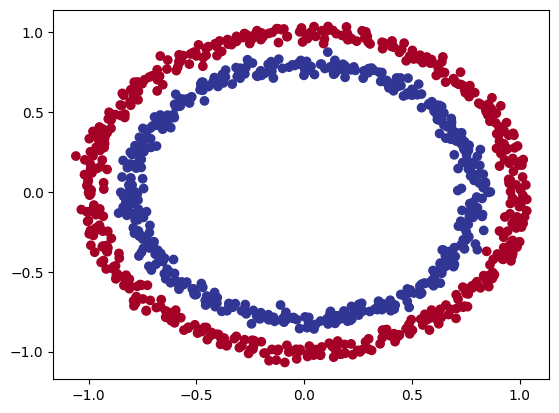

In [6]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [7]:
# Input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X_sample = X[0]
y_sample = y[0]

print(f'Values for a sample of X:{X_sample} and y:{y_sample}')
print(f'Shapes for a sample of X:{X_sample.shape} and y:{y_sample.shape}')
print(f'Type: {type(X)}, dtype: {X.dtype}')

Values for a sample of X:[0.75424625 0.23148074] and y:1
Shapes for a sample of X:(2,) and y:()
Type: <class 'numpy.ndarray'>, dtype: float64


In [9]:
# Convert the data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(f'Type: {type(X)}, dtype: {X.dtype}')

Type: <class 'torch.Tensor'>, dtype: torch.float32


In [10]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Building a model

In [12]:
import torch
from torch import nn

In [13]:
device = 'cude' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [14]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
# alternative approach
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_0.to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5116,  0.1283],
                      [ 0.2683,  0.5138],
                      [ 0.3224,  0.0850],
                      [ 0.6331,  0.4176],
                      [ 0.0194, -0.2777]])),
             ('0.bias', tensor([ 0.1219,  0.3781, -0.6305, -0.3237, -0.2895])),
             ('1.weight',
              tensor([[-0.2617,  0.2038, -0.0124,  0.0317, -0.1411]])),
             ('1.bias', tensor([0.1969]))])

In [17]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"First 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])
First 10 predictions: 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [18]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()

# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [19]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### Train

In [20]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[0.3888],
        [0.3970],
        [0.2882],
        [0.4176],
        [0.1628]])

In [21]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [22]:
# predictions
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5960],
        [0.5980],
        [0.5716],
        [0.6029],
        [0.5406]])

In [23]:
# labels
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [24]:
torch.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ## train
  model_0.train()

  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # loss
  loss = loss_fn(y_logits, y_train)

  # accuracy
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer
  optimizer.zero_grad()

  # backward
  loss.backward()

  # optimizer step
  optimizer.step()


  ## test
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.7033, Acc: 50.00% | Test Loss: 0.7053, Test Acc: 50.00%
Epoch: 10 | Loss: 0.6971, Acc: 50.00% | Test Loss: 0.6996, Test Acc: 50.00%
Epoch: 20 | Loss: 0.6947, Acc: 58.00% | Test Loss: 0.6973, Test Acc: 56.50%
Epoch: 30 | Loss: 0.6938, Acc: 53.62% | Test Loss: 0.6964, Test Acc: 50.50%
Epoch: 40 | Loss: 0.6934, Acc: 52.38% | Test Loss: 0.6961, Test Acc: 51.00%
Epoch: 50 | Loss: 0.6933, Acc: 51.62% | Test Loss: 0.6959, Test Acc: 48.50%
Epoch: 60 | Loss: 0.6932, Acc: 51.12% | Test Loss: 0.6958, Test Acc: 47.50%
Epoch: 70 | Loss: 0.6932, Acc: 51.38% | Test Loss: 0.6957, Test Acc: 48.00%
Epoch: 80 | Loss: 0.6932, Acc: 50.88% | Test Loss: 0.6957, Test Acc: 47.50%
Epoch: 90 | Loss: 0.6932, Acc: 50.75% | Test Loss: 0.6956, Test Acc: 47.00%


In [25]:
# plot decision boundry
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

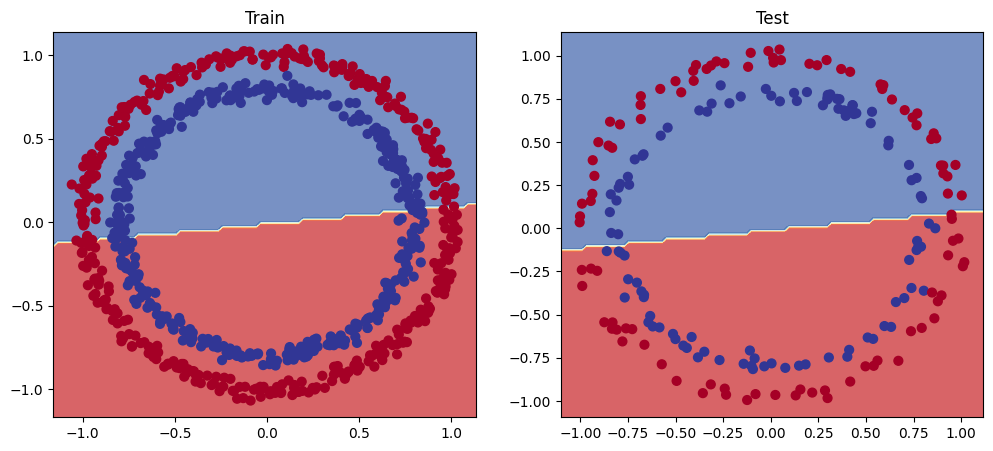

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_0, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_0, X=X_test, y=y_test)

In [27]:
# improve the model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [28]:
# loss
loss_fn = nn.BCEWithLogitsLoss()

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [29]:
# training loop
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ## training
  model_1.train()

  # forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # loss
  loss = loss_fn(y_logits, y_train)

  # accuracy
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # zero grad
  optimizer.zero_grad

  # backpropagation
  loss.backward()

  # gradient descent
  optimizer.step()

  ## Testing
  model_1.eval()

  with torch.inference_mode():
    # forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # loss
    test_loss = loss_fn(test_logits, y_test)

    # accuracy
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6940, Acc: 50.88% | Test Loss: 0.6926, Test Acc: 51.00%
Epoch: 100 | Loss: 0.6931, Acc: 51.25% | Test Loss: 0.6961, Test Acc: 46.50%
Epoch: 200 | Loss: 0.6930, Acc: 50.00% | Test Loss: 0.6943, Test Acc: 47.00%
Epoch: 300 | Loss: 0.6932, Acc: 49.50% | Test Loss: 0.6937, Test Acc: 51.50%
Epoch: 400 | Loss: 0.6931, Acc: 48.25% | Test Loss: 0.6947, Test Acc: 46.50%
Epoch: 500 | Loss: 0.6932, Acc: 50.50% | Test Loss: 0.6960, Test Acc: 47.00%
Epoch: 600 | Loss: 0.6934, Acc: 51.75% | Test Loss: 0.6941, Test Acc: 52.50%
Epoch: 700 | Loss: 0.6933, Acc: 51.00% | Test Loss: 0.6956, Test Acc: 49.00%
Epoch: 800 | Loss: 0.6932, Acc: 52.12% | Test Loss: 0.6947, Test Acc: 50.00%
Epoch: 900 | Loss: 0.6935, Acc: 50.25% | Test Loss: 0.6935, Test Acc: 49.50%


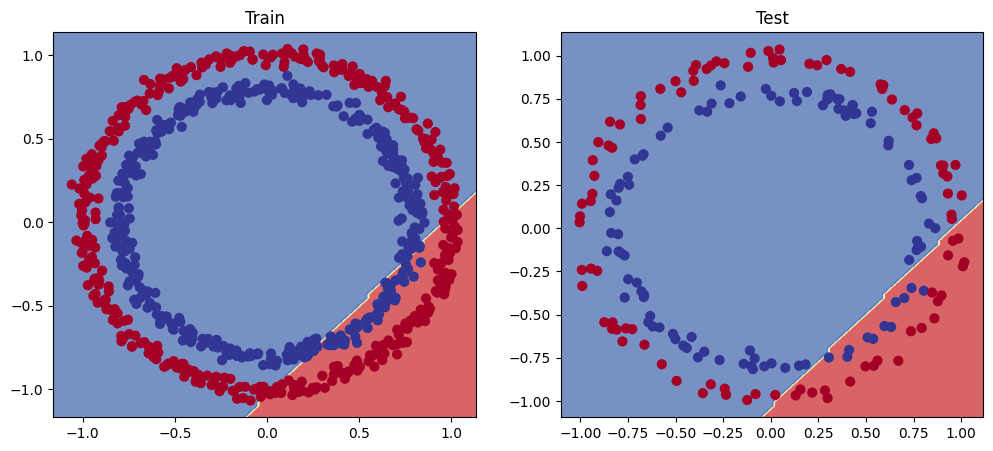

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_1, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_1, X=X_test, y=y_test)

In [30]:
## Add non-linear activation function
